## **AMES HOUSING PRICE PREDICTION PROJECT**

Hi, Welcome to my Notebook where I make a Machine Learning Model for Housing Price Prediction on the Ames Housing Dataset on Kaggle!

---
### **OVERVIEW**

This Project covers all the necessary steps to complete the Machine Learning Task of Predicting the Housing Prices on Ames Housing Dataset available on Kaggle. I performed the following steps for successfully creating a model for house price prediction:


**1. Data Extraction**
* Import libraries.
* Import Dataset from Kaggle and store in train and test dataframes.

**2. EDA (Exploratory Data Analysis) and Visualization**
* Taking a look at the distribution of data
* Correlation between features
* Detailed look at the features with highest correlation to target

**3. Preprocessing**
* Dealing with Null (NaN) Values - by imputing them and by replacing with a constant value.
* Feature Engineering
* Normalization

**4. Modeling**
* trying out different models and selecting the best using cross-validation
* We use the following models:
    * Linear Regression
    * Ridge Regression
    * SVR
    * Decision Tree Regressor
    * Random Forest Regressor
    * Gradient Boosting Regressor
    * XGBoost Regressor
    * CatBoost Regressor

**5. Submission**
* making predictions using the final model and storing it as csv for submission.

## **1. DATA EXTRACTION**

In [1]:
#IMPORTING BASIC LIBRARIES AND PATH
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline 

#WORKING DIRECTORY PATH FROM WHERE TO IMPORT TRAIN AND TEST DATA 
input_path = "/kaggle/input/house-prices-advanced-regression-techniques/"

In [2]:
#IMPORTING DATA
housing_train_data = pd.read_csv(input_path + 'train.csv')
housing_test_data = pd.read_csv(input_path + 'test.csv')

housing_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [3]:
housing_train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## **2. EDA AND VISUALIZATION**

Understanding the data before starting to work on it and creating a model. We will perform Exploratory Data Analysis on the dataset and learn important relationship between features using statistical analysis and visualization.

First let's take a look at our target variable (housing price).

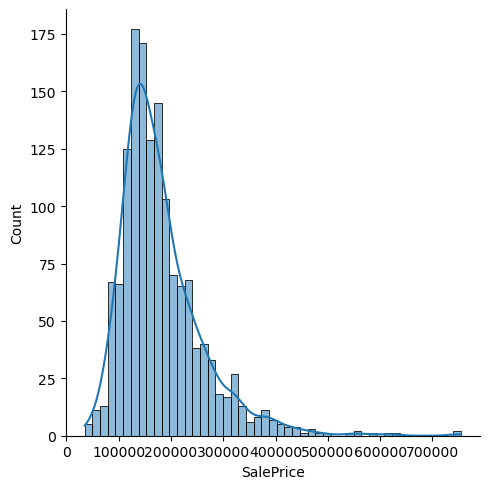

In [4]:
sns.displot(housing_train_data['SalePrice'], kde = True)

We can see that our target feature has highly skewed distribution (right-skewed). We will have to deal with it to improve our models performance.

### **Correlation between features**

We can visualize the correlation between differnt features using the correlation matrix and heatmap

<AxesSubplot:>

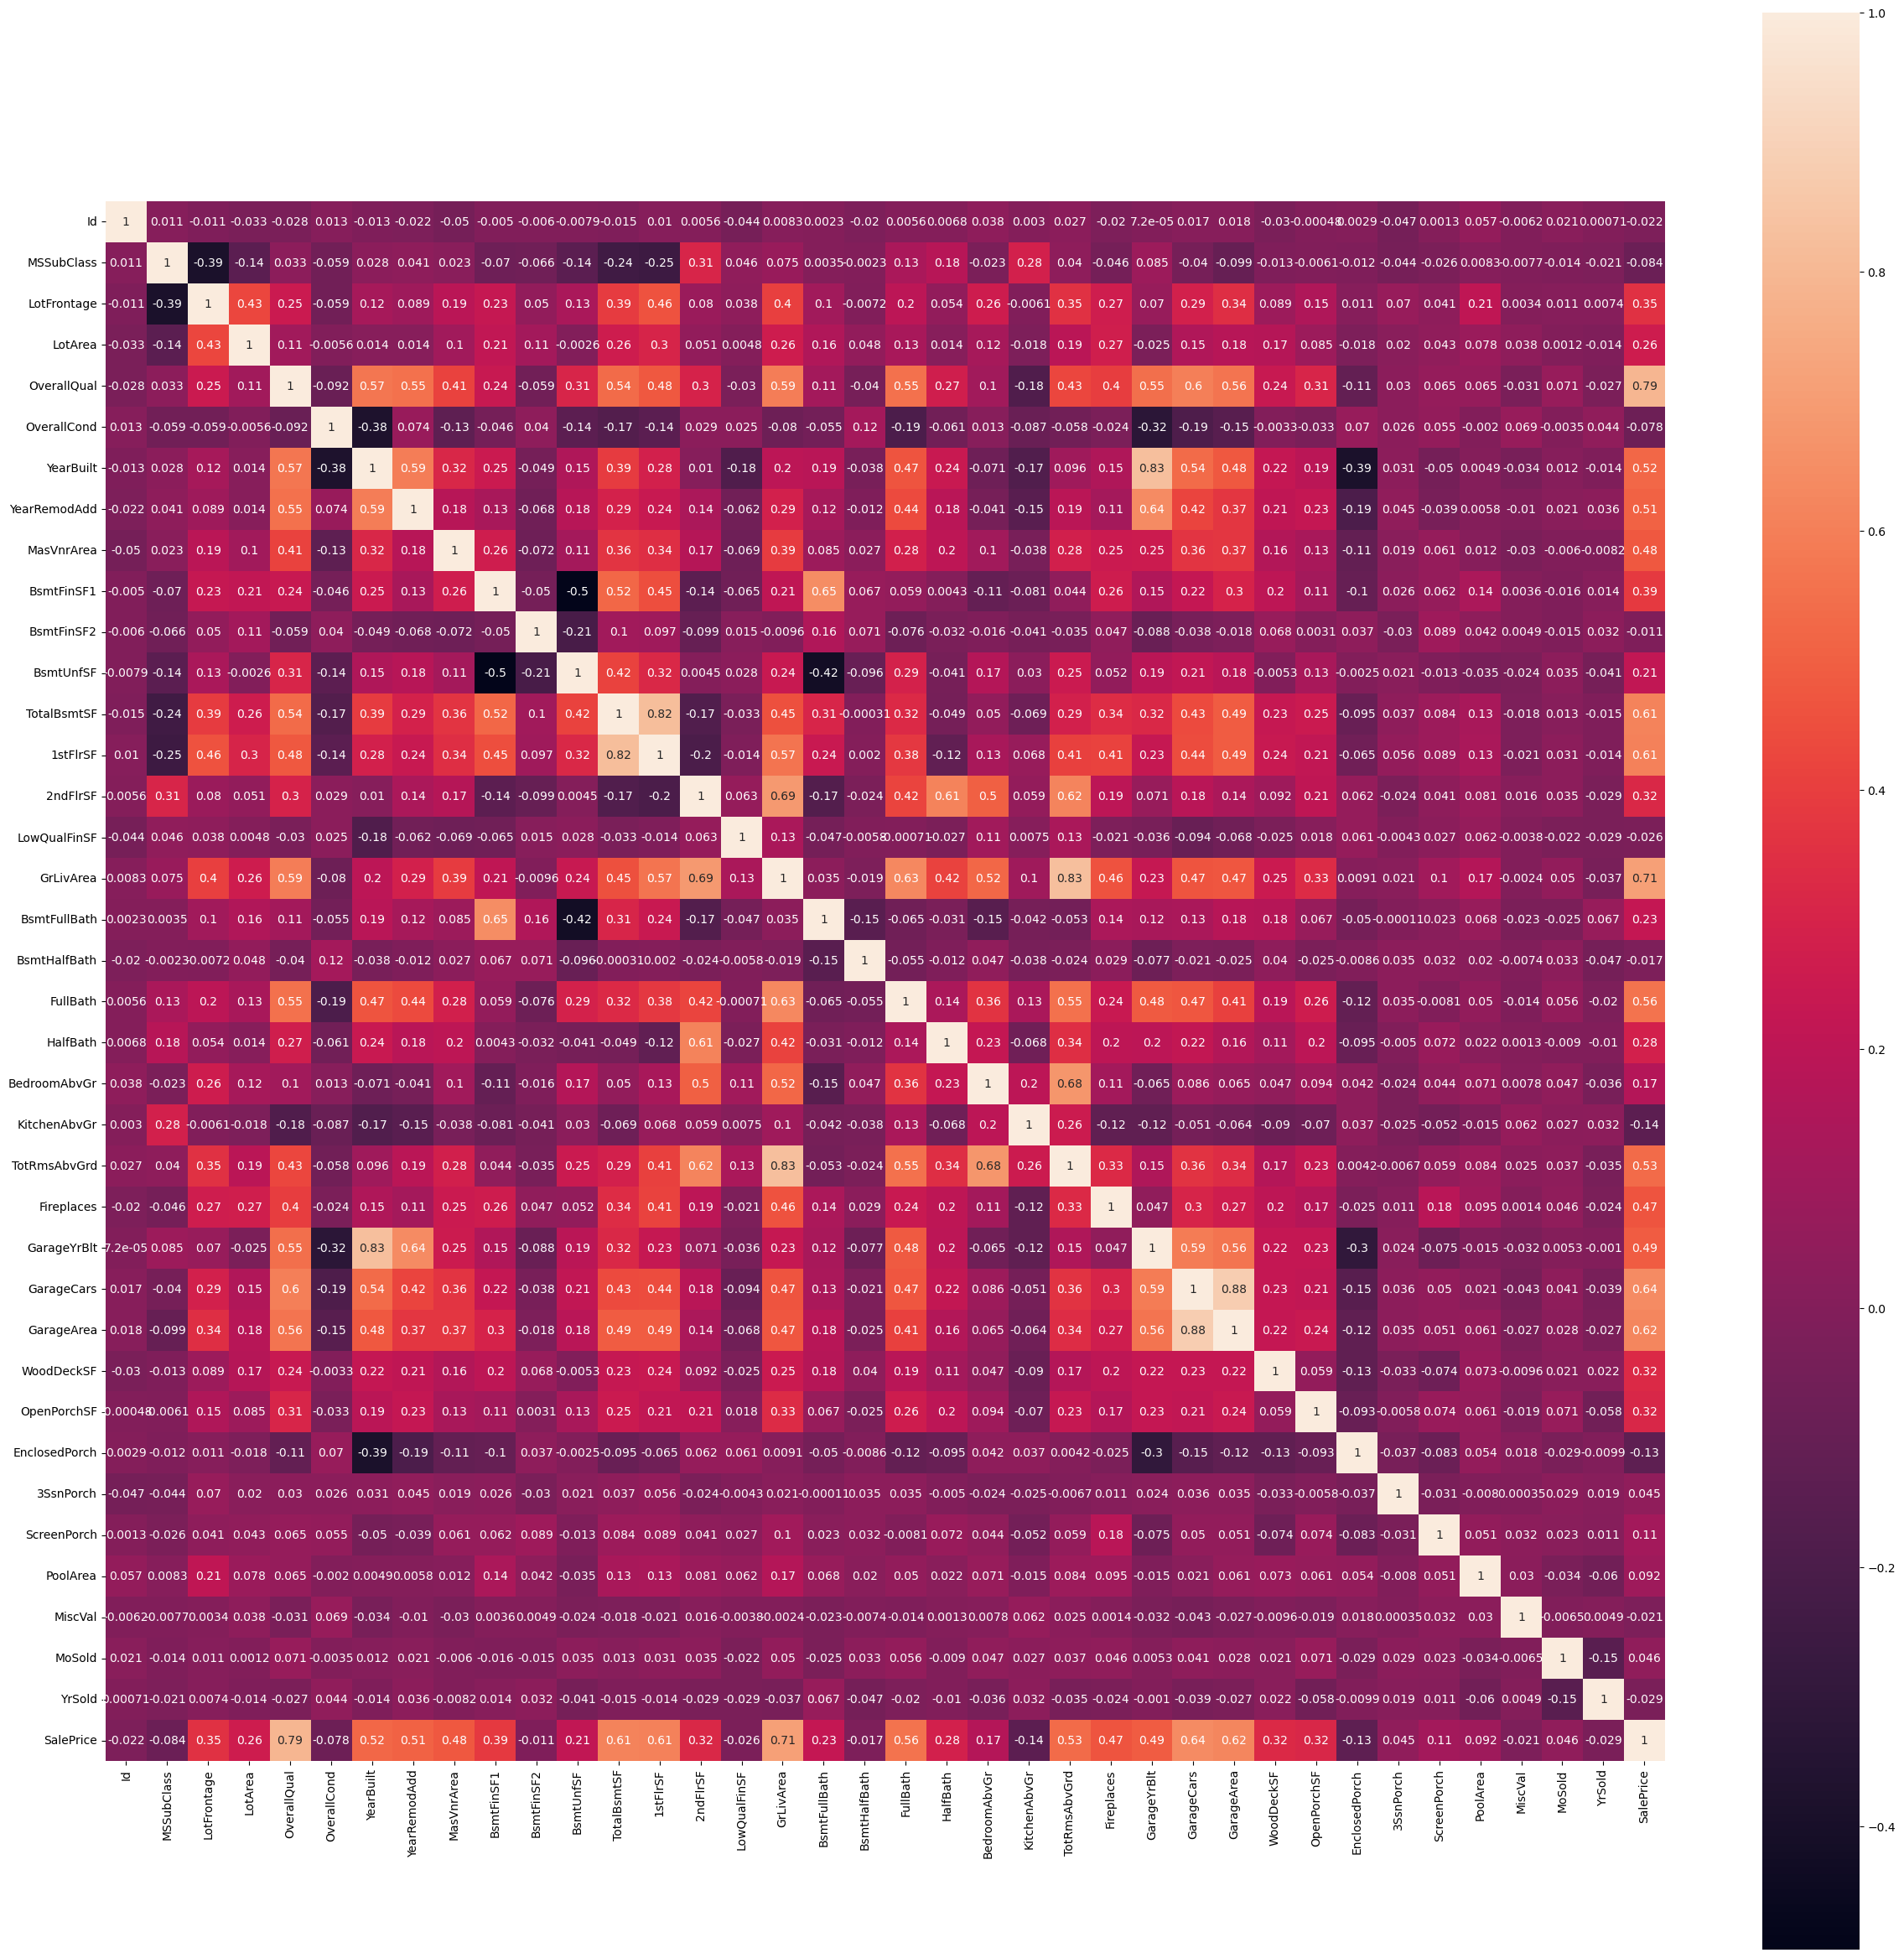

In [5]:
plt.figure(figsize=(30,30)) 
corr_matrix = housing_train_data.corr()
sns.heatmap(corr_matrix, annot = True, square = True)

We can see the features that are the most correlated with target variables are : 'OverallQual', 'GrLivArea', 'TotalBsmtSF', 'YearBuilt', 'GarageCars' and 'TotRmsAbvGrd'

<AxesSubplot:xlabel='OverallQual', ylabel='SalePrice'>

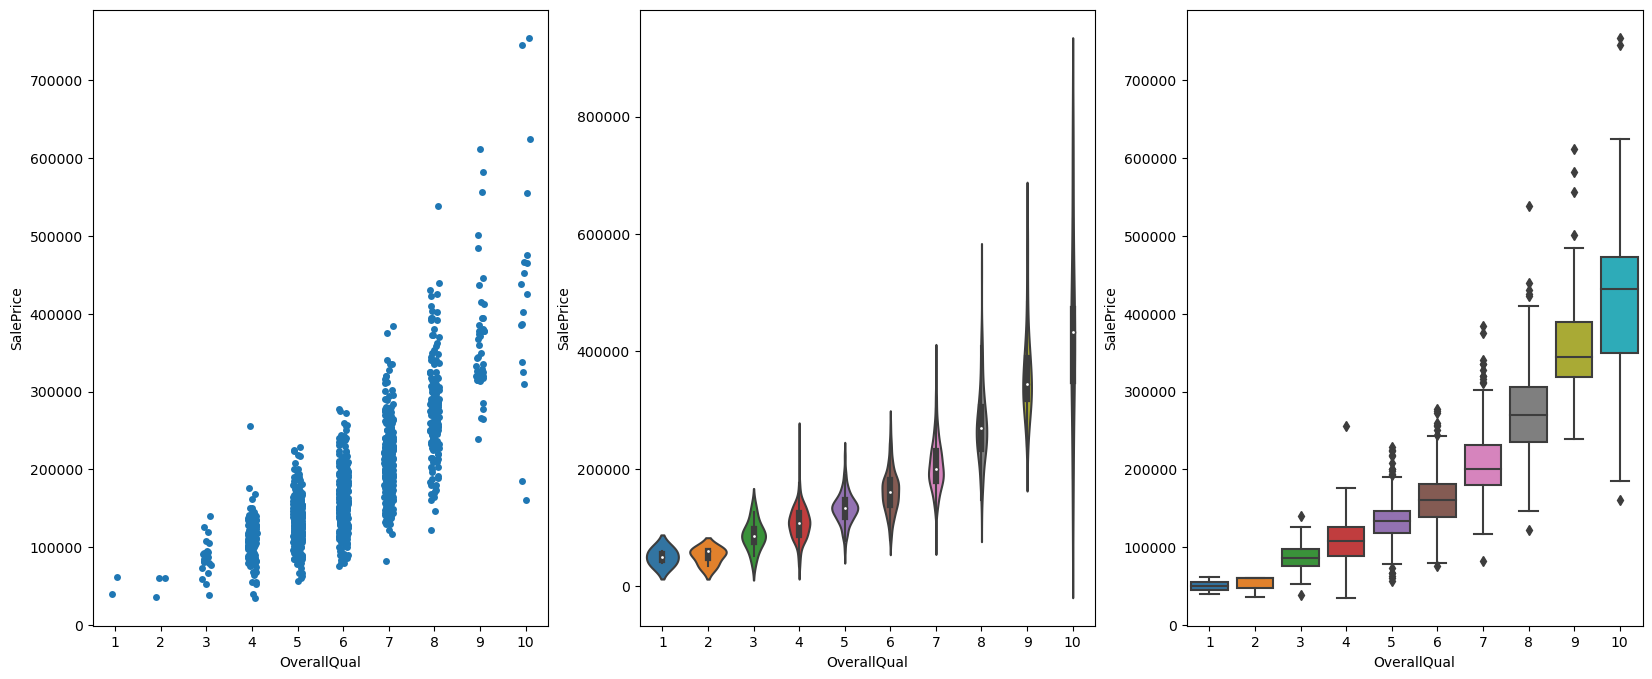

In [6]:
# OverallQuall - SalePrice [Pearson = 0.79]

fig, ax = plt.subplots(1, 3, figsize = (20,8))
sns.stripplot(data = housing_train_data, x = 'OverallQual', y = 'SalePrice', ax = ax[0])
sns.violinplot(data = housing_train_data, x = 'OverallQual', y = 'SalePrice', ax = ax[1])
sns.boxplot(data = housing_train_data, x = 'OverallQual', y = 'SalePrice', ax = ax[2])

<AxesSubplot:xlabel='TotRmsAbvGrd', ylabel='SalePrice'>

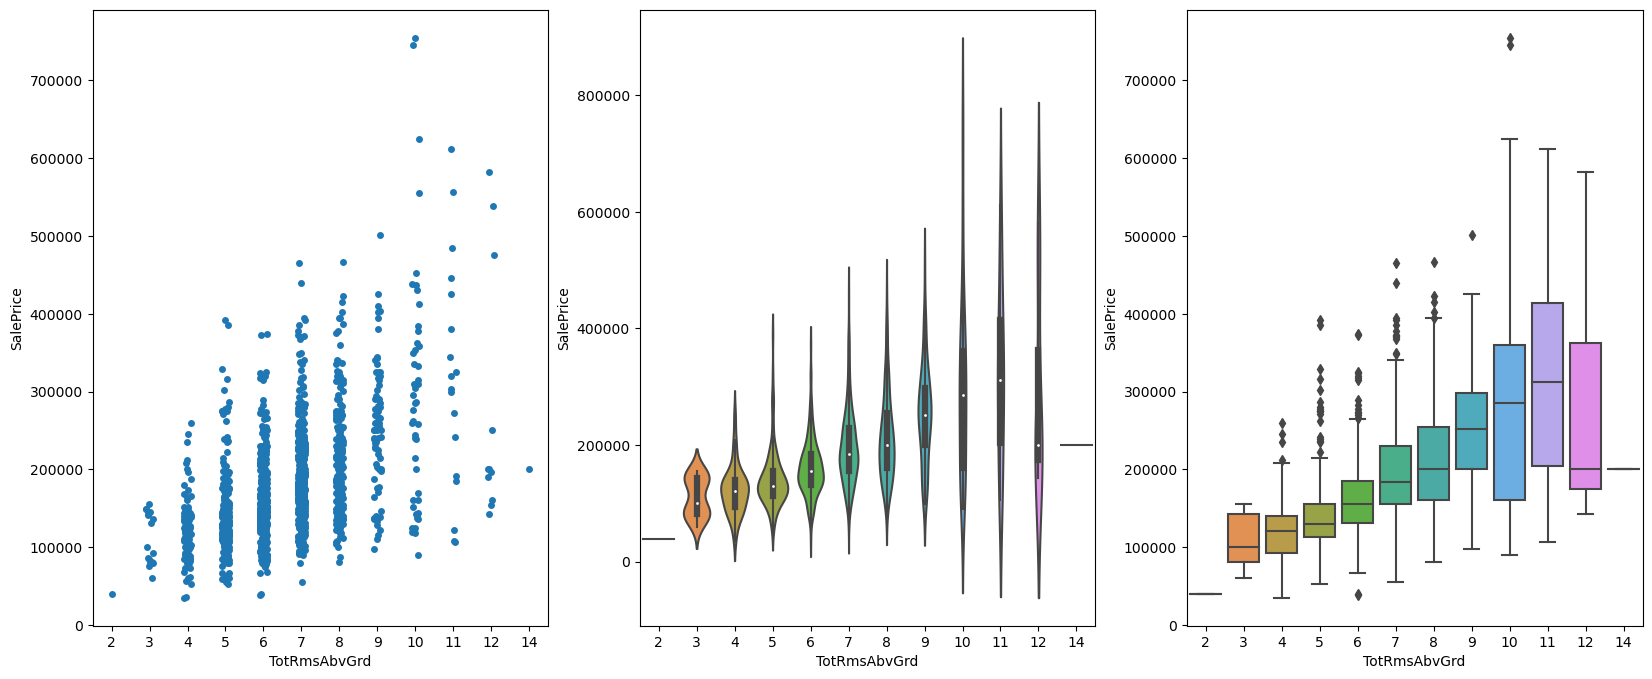

In [7]:
# TotRmsAbvGrd - SalePrice [Pearson = 0.53]

fig, ax = plt.subplots(1, 3, figsize = (20,8))
sns.stripplot(data = housing_train_data, x = 'TotRmsAbvGrd', y = 'SalePrice', ax = ax[0])
sns.violinplot(data = housing_train_data, x = 'TotRmsAbvGrd', y = 'SalePrice', ax = ax[1])
sns.boxplot(data = housing_train_data, x = 'TotRmsAbvGrd', y = 'SalePrice', ax = ax[2])

<AxesSubplot:xlabel='GarageCars', ylabel='SalePrice'>

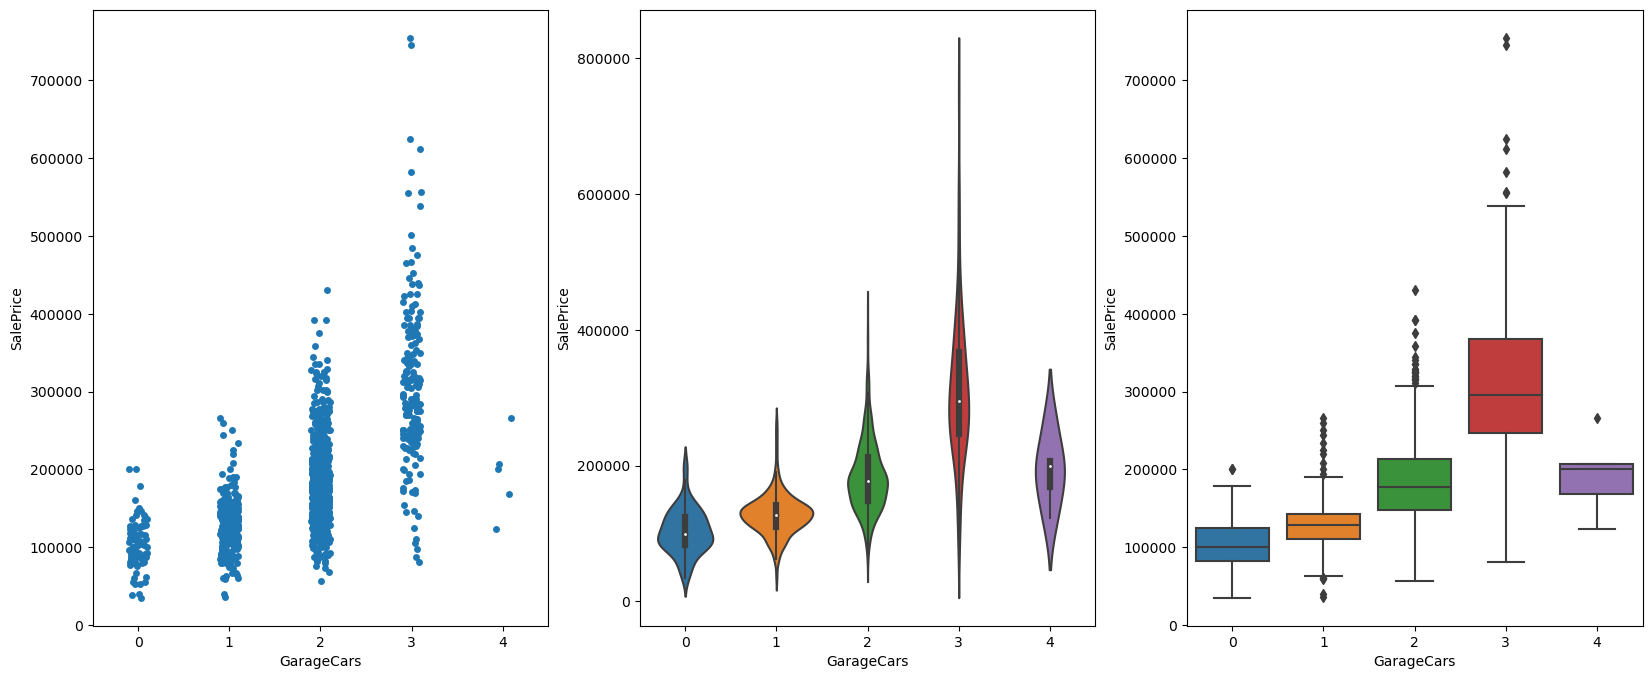

In [8]:
#GarageCars - SalePrice [Pearson = 0.64]

fig, ax = plt.subplots(1, 3, figsize = (20,8))
sns.stripplot(data = housing_train_data, x = 'GarageCars', y = 'SalePrice', ax = ax[0])
sns.violinplot(data = housing_train_data, x = 'GarageCars', y = 'SalePrice', ax = ax[1])
sns.boxplot(data = housing_train_data, x = 'GarageCars', y = 'SalePrice', ax = ax[2])

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

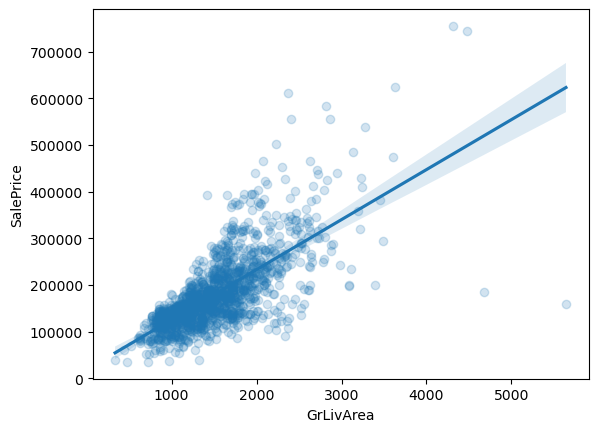

In [9]:
#GrLiveArea - SalePrice [Pearson = 0.71]

#scatter plot with a regression line fitted, here scatter_kws alpha specifies opacity of data points
sns.regplot(data = housing_train_data, x = 'GrLivArea', y = 'SalePrice', scatter_kws = {'alpha' : 0.2}) 

<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

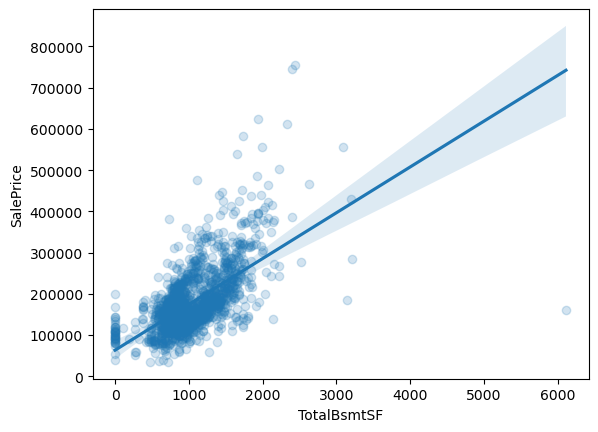

In [10]:
#TotalBsmtSF - SalePrice [Pearson = 0.61]

#scatter plot with a regression line fitted, here scatter_kws alpha specifies opacity of data points
sns.regplot(data = housing_train_data, x = 'TotalBsmtSF', y = 'SalePrice', scatter_kws = {'alpha' : 0.2}) 

<AxesSubplot:xlabel='YearBuilt', ylabel='SalePrice'>

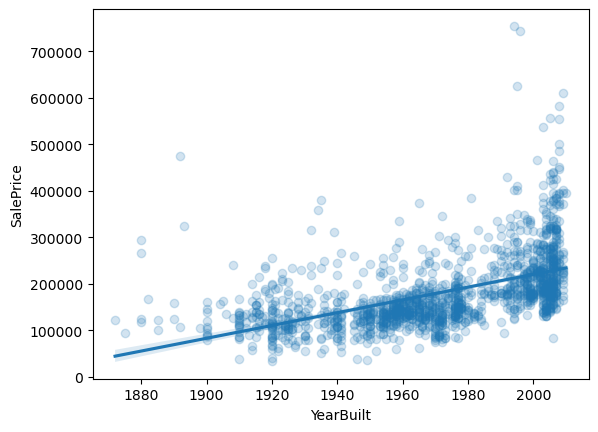

In [11]:
#YearBuilt - SalePrice [Pearson = 0.52]

#scatter plot with a regression line fitted, here scatter_kws alpha specifies opacity of data points
sns.regplot(data = housing_train_data, x = 'YearBuilt', y = 'SalePrice', scatter_kws = {'alpha' : 0.2}) 

Using the above graphs and plots we can clearly see the positive correlation between the features and target variable, this relationships will help our model make better predictions by understanding the data trends and patterns. 

## **3. DATA PREPROCESSSING**

To effectively use our data to train model we have to perform some data preprocessing steps such as:

* Dealing with Null (NaN) values
* Encoding Categorical features 
* Normalization

In [12]:
#SEPERATING THE TARGET AND INPUT FEATURES
#target = y
#input features = X

y_train = housing_train_data['SalePrice']
X_train = housing_train_data.drop(["SalePrice"], axis = 1)

In [13]:
# Converting non-numeric predictors stored as numbers into string

X_train['MSSubClass'] = X_train['MSSubClass'].astype(str)
X_train['YrSold'] = X_train['YrSold'].astype(str)
X_train['MoSold'] = X_train['MoSold'].astype(str)

### **Null Values**

Simple Machine Learning Models cannot handle Missing values and we have to deal with them (impute the values or remove the records or columns with null values)

In [14]:
#THE NULL VALUE % IN DATA

nan = pd.DataFrame(X_train.isna().sum(), columns = ['total_NaN'])
nan['Percentage(%)'] = nan['total_NaN'] / len(X_train) * 100
nan['Feature_name'] = nan.index
nan = nan[nan['total_NaN'] > 0]
nan = nan.sort_values(by = ["total_NaN"])
nan

,total_NaN,Percentage(%),Feature_name
Electrical,1,0.068493,Electrical
MasVnrType,8,0.547945,MasVnrType
MasVnrArea,8,0.547945,MasVnrArea
BsmtQual,37,2.534247,BsmtQual
BsmtCond,37,2.534247,BsmtCond
BsmtFinType1,37,2.534247,BsmtFinType1
BsmtExposure,38,2.602740,BsmtExposure
BsmtFinType2,38,2.602740,BsmtFinType2
GarageCond,81,5.547945,GarageCond
GarageQual,81,5.547945,GarageQual


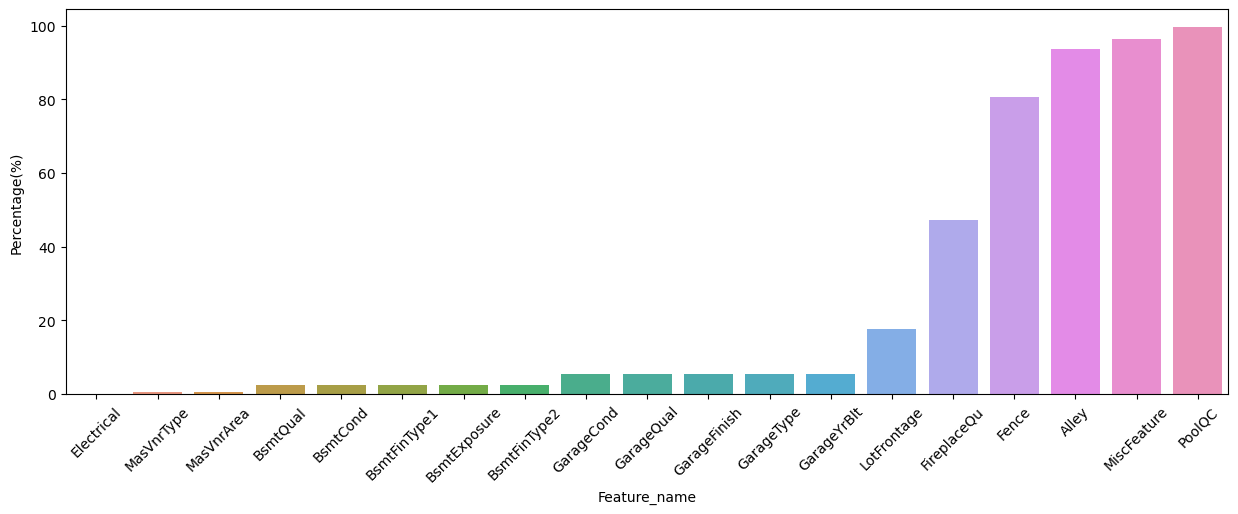

In [15]:
#PLOTTING NAN VALUES

plt.figure(figsize = (15, 5))
sns.barplot(data = nan, x = 'Feature_name', y = 'Percentage(%)')
plt.xticks(rotation = 45)
plt.show()

**Dealing with these Null values**

These are the values stored as Nan in our dataframe but it is not compulsory that they are Missing values, it can also imply some other meaning for that feature (like the absence of something from the house). We can either Impute them or replace them with data according to the data description.

In [16]:
#FILL THE CATEGORICAL NULL VALUES 
#ACCORDING TO THE DESCRIPTION OF DATA GIVEN IN 'data_description.txt' file

#HERE NONE MEANS THESE FEATURES ARE NOT AVAIABLE IN THE HOUSE
list_of_features_with_None_values = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', "MasVnrType"]

for feat in list_of_features_with_None_values:
    X_train[feat] = X_train[feat].fillna("None")

#we are assuming the missing value to be the standard value
X_train['Electrical'] = X_train['Electrical'].fillna("SBrkr")

In [17]:
#FILL THE NUMERICAL NULL VALUES
#IMPUTE THE MISSING NUMERICAL VALUES USING KNN REGRESSOR 

from sklearn.impute import KNNImputer

# DEFINE IMPUTER
imputer = KNNImputer()

num_features = ["LotFrontage", "MasVnrArea", "GarageYrBlt"]

imputer.fit(X_train[num_features])
X_train[num_features] = imputer.transform(X_train[num_features])

In [18]:
#CHECKING IF ANY NULL VALUES STILL PRESENT 
for col in X_train:
    if X_train[col].isna().sum() > 0:
        print(col, " ", X_train[col][0])

We have successfully removed all the null values in our dataset with appropriate data.

### **FEATURE ENGINEERING**

We can create new features by combining the features we already have. It can help us increase the model performance.

In [19]:
X_train["SqFtPerRoom"] = X_train["GrLivArea"] / (X_train["TotRmsAbvGrd"] + X_train["FullBath"] + X_train["HalfBath"] + X_train["KitchenAbvGr"])

X_train['Total_Home_Quality'] = X_train['OverallQual'] + X_train['OverallCond']

X_train['Total_Bathrooms'] = (X_train['FullBath'] + (0.5 * X_train['HalfBath']) + X_train['BsmtFullBath'] + (0.5 * X_train['BsmtHalfBath']))

X_train["HighQualSF"] = X_train["1stFlrSF"] + X_train["2ndFlrSF"]

# Creating dummy variables from categorical features

X_train_dummies = pd.get_dummies(X_train)

### **NORMALIZATION**

Normalize the features which have a highly skewed data distribution using log transformation

In [20]:
from scipy.stats import skew

# Fetch all numeric features
numeric_features = X_train_dummies.dtypes[X_train_dummies.dtypes != object].index

#determine which features have a skewed distribution
skewed_features = X_train_dummies[numeric_features].apply(lambda x: skew(x)).sort_values(ascending=False)
high_skew = skewed_features[skewed_features > 0.5]
skew_index = high_skew.index

# Normalize skewed features using log_transformation
for i in skew_index:
    X_train_dummies[i] = np.log1p(X_train_dummies[i])

In [21]:
#DURING EDA WE SAW THAT OUR TARGET FEATURE DISTRIBUTION IS ALSO HIGHLY SKEWED
# TRANSFORM TARGET DISTRIBUTION INTO A NORMAL ONE USING LOG TRANSFORMATION
y_train_log = np.log1p(y_train)

## **4. MODELING**

Now that we have the data in the usable format we can try to fit our data to a Machine Learning Model and check which model works the best for application using the cross-validation score.

We will use the following models:
* Linear Regression
* Ridge Regression
* SVR
* Decision Tree Regressor
* Random Forest Regressor
* Gradient Boosting Regressor
* XGBoost Regressor
* CatBoost Regressor

In [22]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_squared_log_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb

In [23]:
# Creation of the RMSE metric:
kf = KFold(n_splits = 10, random_state = 42, shuffle = True)

def rmse(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model):
    rmse = np.sqrt(-cross_val_score(model, X_train_dummies, y_train_log, scoring="neg_mean_squared_error", cv=kf))
    return (rmse)

In [24]:
#CREATE A DICTONARY TO STORE THE CV-RMSE SCORES FOR EACH MODEL WITH NAME OF THE MODEL
cv_score = {}

In [25]:
#LINEAR REGRESSION
linear_regression_model = LinearRegression()
cv_score['linear_regression_model'] = cv_rmse(linear_regression_model).mean()

In [26]:
#RIDGE REGRESSION
ridge_regression_model = Ridge()
cv_score['ridge_regression_model'] = cv_rmse(ridge_regression_model).mean()

In [27]:
#SVR
svr_model = SVR()
cv_score['svr_model'] = cv_rmse(svr_model).mean()

In [28]:
#DECISION TREE REGRESSOR
decision_tree_model = DecisionTreeRegressor()
cv_score['decision_tree_model'] = cv_rmse(decision_tree_model).mean()

In [29]:
#RANDOM FOREST REGRESSOR
random_forest_model = RandomForestRegressor()
cv_score['random_forest_model'] = cv_rmse(random_forest_model).mean()

In [30]:
#GRADIENT BOOSTING REGRESSOR
gradient_boosting_model = GradientBoostingRegressor()
cv_score['gradient_boosting_model'] = cv_rmse(gradient_boosting_model).mean()

In [31]:
#XGBOOST REGRESSOR
xgb_model = xgb.XGBRegressor()
cv_score['xgb_model'] = cv_rmse(xgb_model).mean()

In [32]:
#CATBOOST REGRESSOR
catb_model = CatBoostRegressor()
cv_score['catb_model'] = cv_rmse(catb_model).mean()

Learning rate set to 0.042748
0:	learn: 0.3835451	total: 61.7ms	remaining: 1m 1s
1:	learn: 0.3728610	total: 66.5ms	remaining: 33.2s
2:	learn: 0.3623613	total: 71.2ms	remaining: 23.7s
3:	learn: 0.3543449	total: 75.4ms	remaining: 18.8s
4:	learn: 0.3456021	total: 79.8ms	remaining: 15.9s
5:	learn: 0.3371954	total: 84.2ms	remaining: 14s
6:	learn: 0.3285822	total: 89ms	remaining: 12.6s
7:	learn: 0.3211888	total: 93.7ms	remaining: 11.6s
8:	learn: 0.3132477	total: 98.2ms	remaining: 10.8s
9:	learn: 0.3053072	total: 103ms	remaining: 10.2s
10:	learn: 0.2981044	total: 107ms	remaining: 9.61s
11:	learn: 0.2916967	total: 111ms	remaining: 9.15s
12:	learn: 0.2852958	total: 115ms	remaining: 8.76s
13:	learn: 0.2780929	total: 120ms	remaining: 8.43s
14:	learn: 0.2717357	total: 124ms	remaining: 8.13s
15:	learn: 0.2662674	total: 128ms	remaining: 7.87s
16:	learn: 0.2607551	total: 132ms	remaining: 7.66s
17:	learn: 0.2554834	total: 137ms	remaining: 7.47s
18:	learn: 0.2499411	total: 141ms	remaining: 7.28s
19:	le

In [33]:
pd.DataFrame(list(cv_score.items()))

,0,1
0,linear_regression_model,0.142028
1,ridge_regression_model,0.128499
2,svr_model,0.280492
3,decision_tree_model,0.206943
4,random_forest_model,0.139252
5,gradient_boosting_model,0.128010
6,xgb_model,0.135562
7,catb_model,0.117928


From above cross-validation scores we can see that some of the best performing models are 'gradient boosting regressor' and 'cat boosting regressor'

We will proceed with the best model -> 'catb_model'

In [34]:
# SPLIT TRAINING DATA INTO TRAIN AND VALIDATION SET
X_train, X_eval, y_train, y_eval = train_test_split(X_train_dummies, y_train_log, test_size = 0.1, random_state = 42)

#FINAL MODEL
cat = CatBoostRegressor()

cat_model = cat.fit(X_train, y_train,
                     eval_set = (X_eval, y_eval),
                     verbose = 0)

In [35]:
cat_pred = cat_model.predict(X_eval)
cat_score = rmse(y_eval, cat_pred)
cat_score

0.11001058239194178

In [36]:
# Features' importance of our model - using this we can see what our model thinks are the most important features

feat_imp = cat_model.get_feature_importance(prettified=True)
feat_imp

,Feature Id,Importances
0,OverallQual,19.156439
1,HighQualSF,10.680066
2,YearBuilt,5.538509
3,GrLivArea,5.385064
4,Total_Home_Quality,4.383187
...,...,...
331,MiscFeature_Othr,0.000000
332,MiscFeature_TenC,0.000000
333,SaleType_Con,0.000000
334,SaleType_ConLw,0.000000


## **5. SUBMISSION**

In [37]:
X_test = housing_test_data

In [38]:
X_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


Performing the preprocessing steps on test data that were performed on train data.

In [39]:
# Converting non-numeric predictors stored as numbers into string

X_test['MSSubClass'] = X_test['MSSubClass'].astype(str)
X_test['YrSold'] = X_test['YrSold'].astype(str)
X_test['MoSold'] = X_test['MoSold'].astype(str)

#FILL THE CATEGORICAL NULL VALUES 
#ACCORDING TO THE DESCRIPTION OF DATA GIVEN IN 'data_description.txt' file

#HERE NONE MEANS THESE FEATURES ARE NOT AVAIABLE IN THE HOUSE
list_of_features_with_None_values = ["PoolQC", "MiscFeature", "Alley", "Fence", "FireplaceQu", 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', "MasVnrType"]

for feat in list_of_features_with_None_values:
    X_test[feat] = X_test[feat].fillna("None")

X_test['Electrical'] = X_test['Electrical'].fillna("SBrkr")

X_test[num_features] = imputer.transform(X_test[num_features])

X_test["SqFtPerRoom"] = X_test["GrLivArea"] / (X_test["TotRmsAbvGrd"] + X_test["FullBath"] + X_test["HalfBath"] + X_test["KitchenAbvGr"])

X_test['Total_Home_Quality'] = X_test['OverallQual'] + X_test['OverallCond']

X_test['Total_Bathrooms'] = (X_test['FullBath'] + (0.5 * X_test['HalfBath']) + X_test['BsmtFullBath'] + (0.5 * X_test['BsmtHalfBath']))

X_test["HighQualSF"] = X_test["1stFlrSF"] + X_test["2ndFlrSF"]

In [40]:
# Creating dummy variables from categorical features
X_test_dummies = pd.get_dummies(X_test)

X_test_dummies = X_test_dummies.reindex(columns = X_train_dummies.columns, fill_value=0.0)

In [41]:
X_test_dummies

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1461,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,...,0,0,0,1,0,0,0,0,1,0
1,1462,81.0,14267,6,6,1958,1958,108.0,923.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,1463,74.0,13830,5,5,1997,1998,0.0,791.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,1464,78.0,9978,6,6,1998,1998,20.0,602.0,0.0,...,0,0,0,1,0,0,0,0,1,0
4,1465,43.0,5005,8,5,1992,1992,0.0,263.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,2916,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,2917,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,2918,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


In [42]:
#NORMALIZE - the highly skewed features learned from training
for i in skew_index:
    X_test_dummies[i] = np.log1p(X_test_dummies[i])

In [43]:
#MAKE PREDICTIONS ON THE TEST DATA
cat_pred_test = cat_model.predict(X_test_dummies)

cat_pred_test = np.expm1(cat_pred_test)

In [44]:
cat_pred_test

array([126789.08768578, 164249.51860091, 185749.20179032, ...,
       152086.84667043, 111748.85390918, 226421.20633735])

In [45]:
#CONVERT THE PREDICTIONS INTO DATAFRAME TO BE SUBMITTED IN COMPETITION
submission = pd.DataFrame(X_test_dummies.Id, columns = ['Id'])

In [46]:
submission["SalePrice"] = cat_pred_test

In [47]:
submission

,Id,SalePrice
0,1461,126789.087686
1,1462,164249.518601
2,1463,185749.201790
3,1464,190623.383347
4,1465,183668.180375
...,...,...
1454,2915,84213.228380
1455,2916,80905.909499
1456,2917,152086.846670
1457,2918,111748.853909


In [48]:
#SAVING THE RESULTS IN A CSV FILE FOR SUBMISSION 

submission.to_csv("submission.csv", index = False, header = True)